In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
titanic_data = pd.read_csv('titanic/train.csv')

In [107]:
titanic_data.describe()
# titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


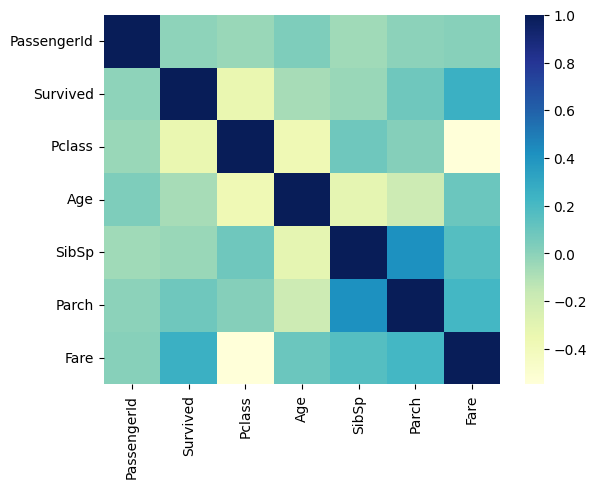

In [108]:
# sns.heatmap(titanic_data.corr(), cmap='YlGnBu')
# 👆 above line gives error. WHY? IDK but it taking strings too So
# plt.show()
# ----------- one solution is this -----------
numerical_cols = titanic_data.select_dtypes(include=[np.number])
corr_matrix = numerical_cols.corr()
sns.heatmap(corr_matrix, cmap='YlGnBu')
# 👇 This function is used to show the plot or figure that has been created using other Matplotlib functions. It is typically called at the end of a plotting script or notebook cell to display the final visualization.
# 👇 Displays the current plot or figure. But can work without it aswell
plt.show()

In [109]:
titanic_data.info()
# Age is missing for some passengers, cabin we can prune as it has neglegible effect

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [110]:
"""
Splits the `titanic_data` DataFrame into training and test sets using a stratified shuffle split.

The split is performed based on the `Survived`, `Pclass`, and `Sex` columns, ensuring that the distribution of these features is preserved between the training and test sets.

The training set is stored in the `features_train_set` variable, and the test set is stored in the `features_test_set` variable.
"""
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices , test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]): # we cant use Age as it has missing values
    features_train_set = titanic_data.loc[train_indices]
    features_test_set = titanic_data.loc[test_indices]

Pclass
3    99
1    44
2    36
Name: count, dtype: int64

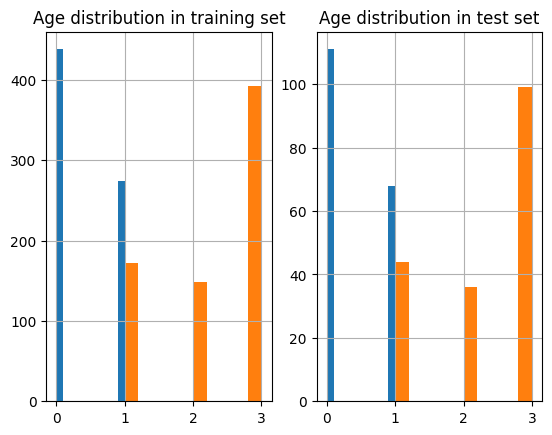

In [111]:
plt.subplot(1,2,1)
plt.title("Age distribution in training set")
features_train_set["Survived"].hist()
features_train_set["Survived"].value_counts()
features_train_set["Pclass"].hist()
features_train_set["Pclass"].value_counts()

plt.subplot(1,2,2)
plt.title("Age distribution in test set")
features_test_set["Survived"].hist()
features_test_set["Survived"].value_counts()
features_test_set["Pclass"].hist()
features_test_set["Pclass"].value_counts()

# plt.show()

In [112]:
titanic_data.info()
# we are using the pandas library to load and inspect the Titanic dataset?
# we are creating a pipeline to preprocess the data and train a machine learning model. This will involve handling missing values, encoding categorical features, and splitting the data into training and testing sets.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [113]:
"""
Imputes missing values in the 'Age' column of a DataFrame using the mean age.

This transformer inherits from `BaseEstimator` and `TransformerMixin` to be used in a scikit-learn pipeline.

Attributes:
    None

Methods:
    fit(X, y=None):
        Fit the transformer. Since this transformer has no parameters to learn, this method simply returns `self`.
    transform(X):
        Transform the input DataFrame `X` by imputing missing values in the 'Age' column using the mean age.
"""
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class Age_Imputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform (self, X):
        imputer = SimpleImputer(strategy='mean') # we can use other strategies like 'median' or 'most_frequent' to impute Age
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [114]:
"""
Transformer class that encodes categorical features using one-hot encoding.

This class takes a DataFrame as input and adds new columns for the encoded
categorical features. The `Embarked` and `Sex` columns are encoded using
one-hot encoding, and the new columns are added to the input DataFrame.

Args:
    X (pandas.DataFrame): The input DataFrame containing the categorical features to be encoded.

Returns:
    pandas.DataFrame: The input DataFrame with the new encoded columns added.
"""
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder (BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()
        
        column_names = ["C", "Q", "S", "N"]
        
        for i in len(matrix.T):
            X[column_names[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[["Sex"]]).toarray()
        
        column_names = ["Male", "Female"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        return X

In [115]:
# dropping irrelevant features
class FeatureDropper (BaseEstimator, TransformerMixin):
    # def __init__(self, features_to_drop):
    #     self.features_to_drop = features_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(["Embarked", "Ticket", "Cabin", "Name", "Sex", "N"], axis=1, errors="ignore")

In [116]:
# pipeline definition to preprocess the data. this will involve handling missing values, encoding categorical features, and splitting the data into training and testing sets.
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", Age_Imputer()), ("featureencoder", FeatureEncoder()), ("featuredropper", FeatureDropper())])

In [117]:
# to fint out the datatype of features_train_set we can use the following code

features_train_set.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [118]:
features_train_set = pipeline.fit_transform(features_train_set)

TypeError: 'int' object is not iterable

In [119]:
features_train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.00000,0,0,24160,211.3375,B5,S
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,29.28866,0,0,112379,39.6000,NaN,C
109,110,1,3,"Moran, Miss. Bertha",female,29.28866,1,0,371110,24.1500,NaN,Q
800,801,0,2,"Ponesell, Mr. Martin",male,34.00000,0,0,250647,13.0000,NaN,S
547,548,1,2,"Padro y Manent, Mr. Julian",male,29.28866,0,0,SC/PARIS 2146,13.8625,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
590,591,0,3,"Rintamaki, Mr. Matti",male,35.00000,0,0,STON/O 2. 3101273,7.1250,NaN,S
687,688,0,3,"Dakic, Mr. Branko",male,19.00000,0,0,349228,10.1708,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C148,C
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.00000,0,0,347466,7.8542,NaN,S
